In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns

In [98]:
df = pd.read_csv('https://raw.githubusercontent.com/Preet-Govind/LinearRegression/main/resources/economic_index.csv')

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
# Drop unnecessary columns
df.drop(columns=['Unnamed: 0','month', 'year'], inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


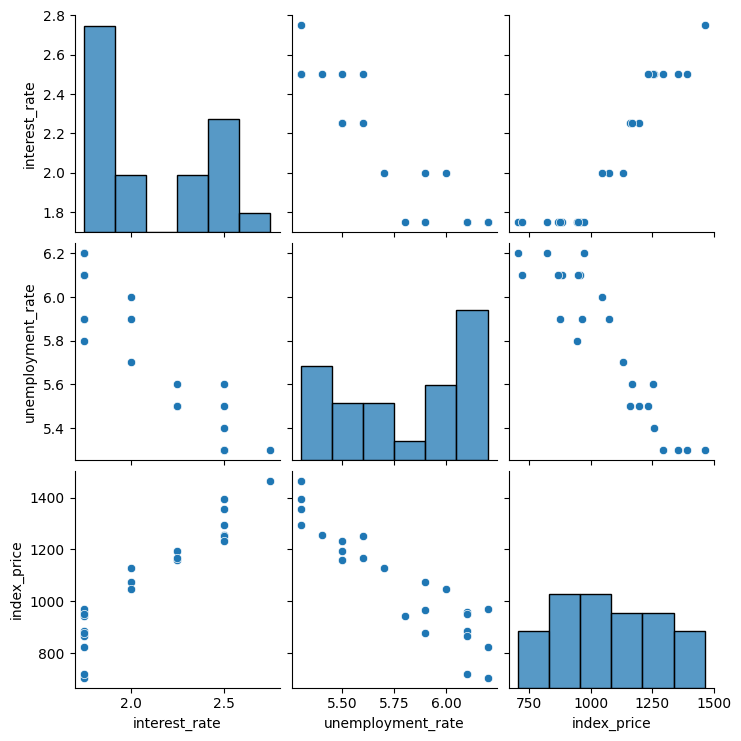

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


As seen above,

inversely proportionals:


1.   index_price & unemployement rate
2.   interest_rate & unemployement rate

directly proportionals:


1.   interest_rate & index_price





Text(0, 0.5, 'Unemployment Rate')

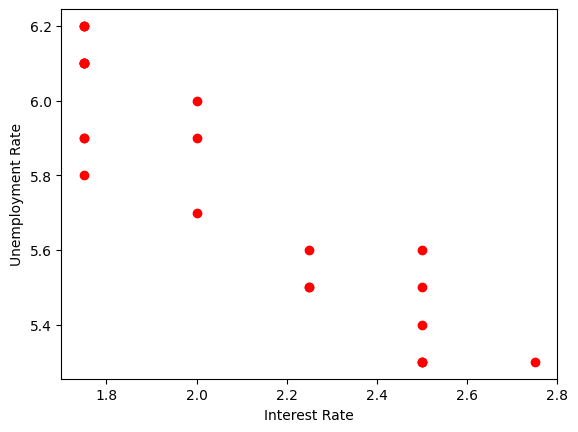

In [13]:
# Visualize more
# Inversely proportional features visualizing
plt.scatter(df['interest_rate'], df['unemployment_rate'],color='red')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

Text(0, 0.5, 'Unemployment Rate')

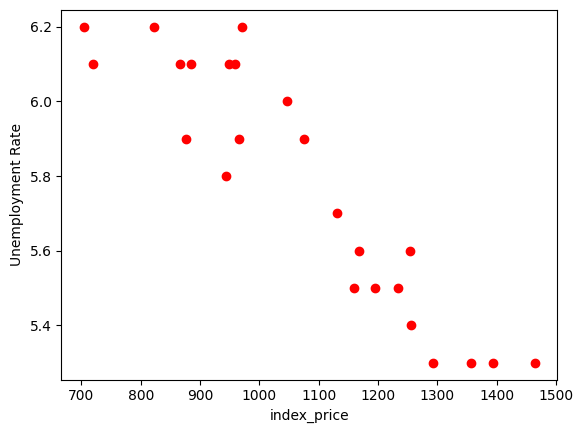

In [16]:
# Visualize more
# Inversely proportional features visualizing
plt.scatter(df['index_price'], df['unemployment_rate'],color='red')
plt.xlabel('index_price')
plt.ylabel('Unemployment Rate')

Text(0, 0.5, 'interest_rate')

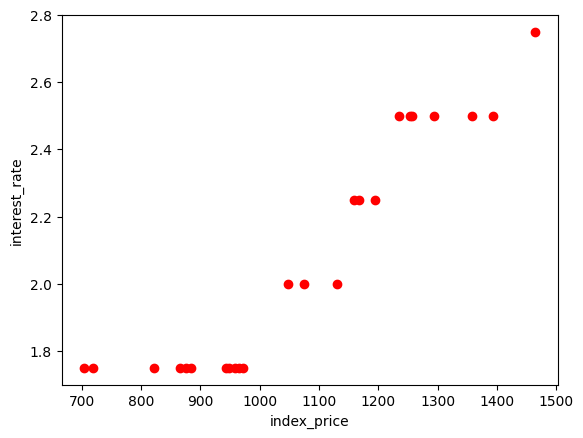

In [18]:
# Visualize more
# Directly proportional features visualizing
plt.scatter(df['index_price'], df['interest_rate'],color='red')
plt.xlabel('index_price')
plt.ylabel('interest_rate')

In [19]:
## independent & dependent feature
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [23]:
y.head()

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256


In [69]:
# Data set split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [70]:
X_train.shape,X_test.shape

((18, 2), (6, 2))

```seaborn.regplot()```

**is used to plot data and a linear regression model fit. It helps visualize the relationship between two variables and how well a linear model fits that relationship.**

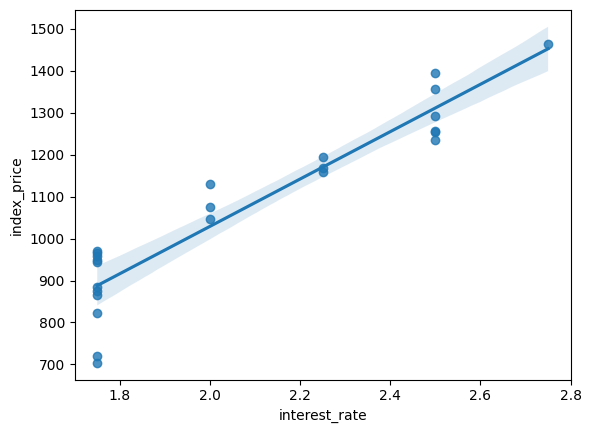

In [71]:
# Incase MLReg , REG plot can be used to visualize line
sns.regplot(x=df['interest_rate'],y=df['index_price'])
plt.show()

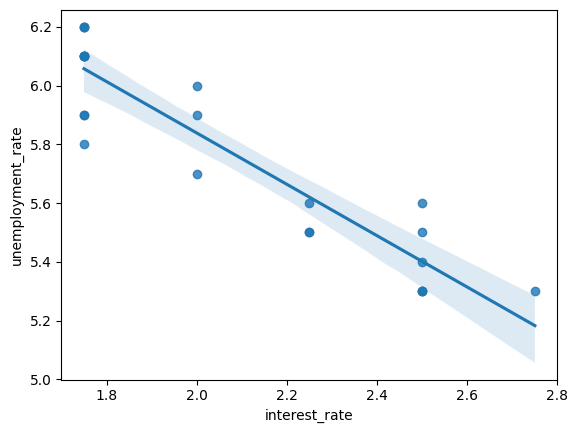

In [72]:
# Incase MLReg , REG plot can be used to visualize line
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])
plt.show()

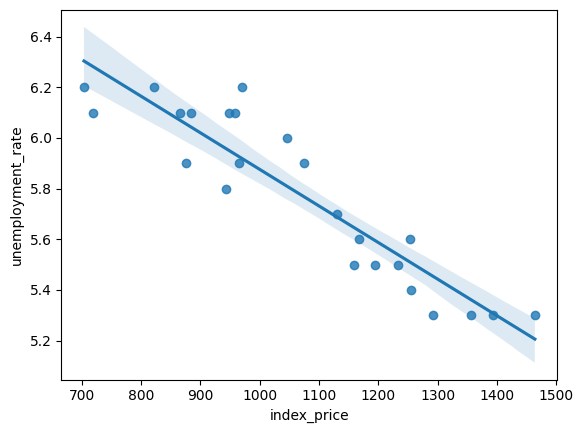

In [73]:
# Incase MLReg , REG plot can be used to visualize line
sns.regplot(x=df['index_price'],y=df['unemployment_rate'])
plt.show()

In [74]:
# Standard scaling
from sklearn.preprocessing import StandardScaler

In [75]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [76]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [77]:
X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

x test and train are np arrays therefore they do not have head()
where as y test and train are df so we can use head()

In [78]:
y_train.head()

,index_price
13,965
1,1394
21,822
5,1254
2,1357


In [43]:
y_test.head()

,index_price
12,1047
23,719
8,1159
4,1256
3,1293


In [79]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [80]:
regression.fit(X_train,y_train)

LinearRegression()

In [81]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [82]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [83]:
np.mean(validation_score)

-5914.828180162386

In [84]:
y_pred = regression.predict(X_test)

In [85]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [86]:
# Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
score = r2_score(y_test,y_pred)
print(f'R2 Score: {score}')

MSE: 5793.762887712569
MAE: 59.935781523235484
RMSE: 76.11677139574805
R2 Score: 0.8278978091457145


In [87]:
adjScore = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjScore

0.7131630152428576

Text(0, 0.5, 'Predicted')

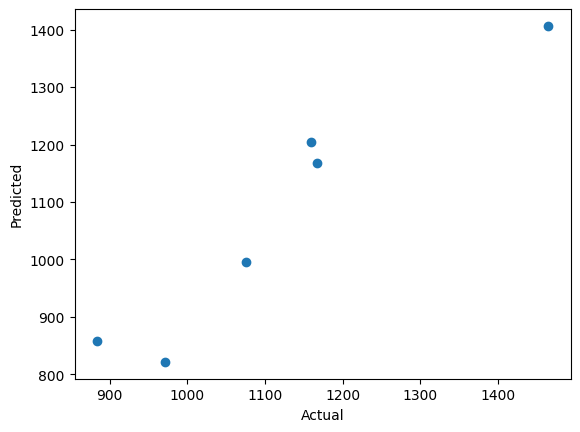

In [88]:
# Assumptions
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [89]:
residuals = y_test - y_pred
residuals#errors

,index_price
8,-45.227704
16,149.349481
0,57.486996
18,26.291104
11,80.090077
9,-1.169327


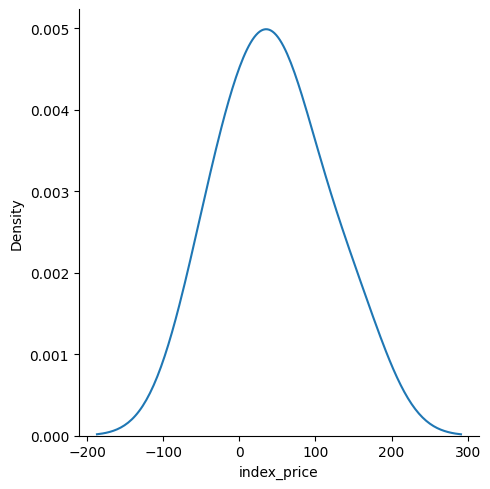

In [90]:
sns.displot(residuals,kind='kde')# kernel density plot

The model isn't good as the above curve isn't bell shaped

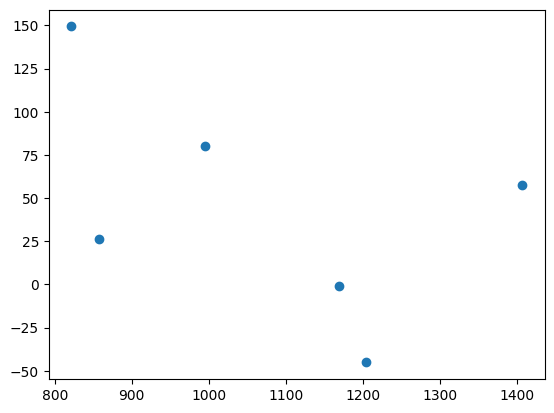

In [91]:
# scatter w.r.t. pred  & residuals
plt.scatter(x=y_pred,y= residuals)

data is uniformly distributed , no such issue from this graph

In [92]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [93]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 01 Sep 2024   Prob (F-statistic):                       0.754
Time:                        12:04:46   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [94]:
regression.coef_

array([  88.27275507, -116.25716066])

In [95]:
regression.intercept_

1053.4444444444443